<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 3:</span> Principal Component Analysis</h1>
<hr>

Welcome to <span style="color:royalblue">Module 3: Principal Component Analysis</span>!

Principal Component Analysis, or PCA, is a popular dimensionality reduction technique.

PCA seeks to create new features by finding linear combinations of your original ones. These new features, called **principal components**, are meant to maximize the **"explained variance,"** which we'll explain further in the module.

* In this module, we'll prepare individual item features for our clustering algorithms, except this time we'll use PCA instead of thresholding.
* PCA is especially effective when you have many correlated features.
* Important: PCA creates new features that replace the original ones.


<br><hr id="toc">

### In this module...

In this module, we'll cover:
1. [Toy example: oval blob](#oval-blob)
2. [Principal components](#components)
3. [Dimensionality reduction](#reduction)
4. [Item data PCA](#item-data)
5. [Explained variance](#explained-variance)

<br><hr>

### First, let's import libraries and load the item data.

First, import libraries that you'll need.

In [3]:
# print_function for compatibility with Python 3
from __future__ import print_function

# NumPy for numerical computing
import numpy as np
# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn (added later)
from sklearn.decomposition import PCA


Next, let's import the full item data that we saved in the previous module (before applying thresholds).
* Remember, we saved it as <code style="color:crimson">'item_data.csv'</code>.
* This time, we'll also pass in the argument <code style="color:steelblue">index_col=0</code> to tell Pandas to treat the first column (CustomerID) as the index.

In [4]:
# Read item_data.csv
item_data = pd.read_csv('project_files/i_data.csv', index_col=0)

Just to confirm, this dataset should have 2574 features:

In [6]:
# Display item_data's shape
item_data.shape

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85231B,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5
12353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<span id="oval-blob"></span>
# 1. Toy example: oval blob

PCA is an elegant technique that's very practical, but it can be a bit hard to try it on our larger dataset right away.

Instead, let's first use one last toy example to break down the intuition behind PCA.

<br>
**First, we'll create an "oval blob" synthetic dataset.**
* Instead of both input features and a target variable, we'll only have 2 input features.
* $x_1$ will be random samples from a normal distribution.
* $x_2$ will be random samples from a normal distribution **plus $x_1$**.

In [18]:
# Set random seed
np.random.seed(101)

# Create first feature: x1
x1 = np.random.normal(0, 1, 100)

# Create second feature: x2
x2 = np.random.normal(0, 1, 100) + x1

**Let's stack them together to form <code style="color:steelblue">X</code>, our input feature matrix.**
* We'll skip putting them in a Pandas DataFrame.
* Instead, we'll just stack them together as two separate columns in a matrix.

In [19]:
# Stack together as columns
X = np.stack([x1, x2], axis=1)

# Print shape of X
print(X.shape)

(100, 2)


**Create a scaled version of your feature matrix and name it <code style="color:steelblue">X_scaled</code>.**
* You'll want to use <code style="color:steelblue">StandardScaler</code>.
* **Tip:** To fit and apply a transformation in one line of code, you can use the <code style="color:steelblue">.fit_transform()</code> function.
* Then, display the first 5 rows. 
    * You can't use <code style="color:steelblue">.head()</code> because it's not a dataframe.
    * You must **index/slice the array** instead.

In [20]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform X
X_scaled = scaler.fit_transform(X)

# Display first 5 rows of X_scaled
X_scaled[:5]

array([[ 2.45737416,  2.76968241],
       [ 0.44665735, -0.38363275],
       [ 0.71733989, -0.37695455],
       [ 0.3264168 , -0.60579169],
       [ 0.46889068,  0.39146426]])

**Plot a scatterplot of the scaled $x_1$ against the scaled $x_2$.**
* Label your axes as <code style="color:crimson">x1 (scaled)</code> and <code style="color:crimson">x2 (scaled)</code>.
* **Tip:** Call <code style="color:steelblue">plt.axis('equal')</code> after your scatterplot to put your plot's axes on the same scale.
* We have a recommended plot below. See the Answer Key for how to create it.

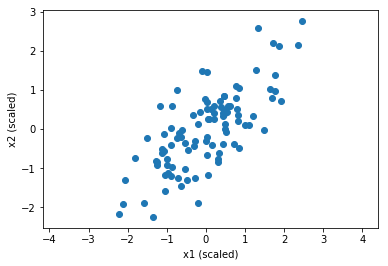

In [21]:
# Plot scatterplot of scaled x1 against scaled x2
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])

# Put plot axes on the same scale
plt.axis('equal')

# Label axes
plt.xlabel('x1 (scaled)')
plt.ylabel('x2 (scaled)')
# Clear text residue
plt.show()

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="components"></span>
# 2. Principal components

As it turns out, this type of distribution is very helpful for visualizing the mechanics behind PCA.

<br>
**First, add the following import line to your library imports above. Then, re-run that code cell.**

<pre style="color:steelblue">
from sklearn.decomposition import PCA
</pre>

<br>
**Next, we can initialize an instance of the PCA transformation.**
* This is just as we did for the StandardScaler transformation. 
* Then, we can fit the instance with just one line of code.

In [22]:
# Initialize instance of PCA transformation
pca = PCA()

# Fit the instance
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Let's display the principal components.**

In [23]:
# Display principal components
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

**Next, let's overlay the principal components on our oval blob.**
* We'll make the oval blob semi-transparent so we can see the principal components more easily.
* For clarity, we'll plot the first principal component in **black**, and we'll make it twice as long.
* We'll plot the first principal component in <strong style="color:red">red</strong>.

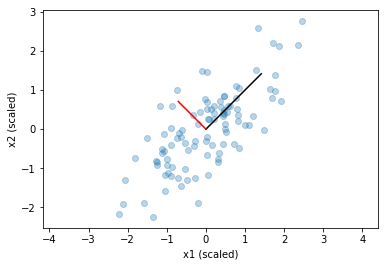

In [24]:
# Plot scaled dataset and make it partially transparent
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.3)

# Plot first principal component in black
plt.plot([0, 2*pca.components_[0, 0]], [0, 2*pca.components_[0, 1]], 'k')

# Plot second principal component in red
plt.plot([0, pca.components_[1, 0]], [0, pca.components_[1, 1]], 'r')

# Set axes
plt.axis('equal')
plt.xlabel('x1 (scaled)')
plt.ylabel('x2 (scaled)')
# Clear text residue
plt.show()

**Finally, we can transform our original features using the fitted PCA instance.**
* Remember, PCA generates new features that **replace** the original ones.
* We'll name these new features <code style="color:crimson">PC</code> (short for "principal component") to indicate that they are generated from PCA.

In [25]:
# Generate new features
PC = pca.transform(X_scaled)

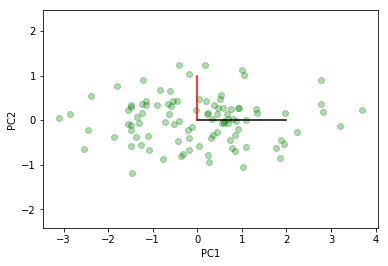

In [26]:
# Plot transformed dataset
plt.scatter(PC[:, 0], PC[:, 1], alpha=0.3, color='g')

# Plot first principal component in black
plt.plot([0, 2], [0, 0], 'k')

# Plot second principal component in red
plt.plot([0, 0], [0, 1], 'r')

# Set axes
plt.axis('equal')
plt.xlabel('PC1')
plt.ylabel('PC2')
# Clear text residue
plt.show()

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="reduction"></span>
# 3. Dimensionality reduction

Here's where dimensionality reduction comes into play. You can just keep some number of the "best" components, a.k.a. the ones that explain the most variance.

<br>
**First, display the "explained variance" ratio of each component.**

In [27]:
# Display explained variance ratio
pca.explained_variance_ratio_

array([0.86915841, 0.13084159])

**To keep only 1 component, we can simply initialize and fit another PCA transformation.**
* This time, we'll simply pass the argument <code style="color:steelblue">n_components=1</code>.

In [28]:
# Initialize and fit a PCA transformation, only keeping 1 component
pca = PCA(n_components=1)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
# Display principal components
pca.components_

array([[0.70710678, 0.70710678]])

In [30]:
# Generate new features
PC = pca.transform(X_scaled)
print(PC.shape)

(100, 1)


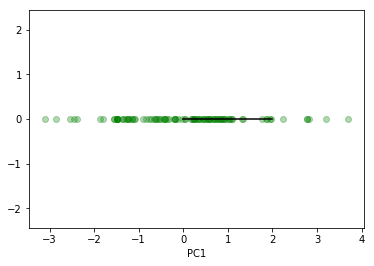

In [31]:
# Plot transformed dataset
plt.scatter(PC[:, 0], len(PC)*[0], alpha=0.3, color='g')

# Plot first principal component in black
plt.plot([0, 2], [0, 0], 'k')

# Set axes
plt.axis('equal')
plt.xlabel('PC1')

# Clear text residue
plt.show()

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="item-data"></span>
# 4. Item data PCA

Now let's get back to our project.

<br>
**First, scale <code style="color:crimson">item_data</code>, which you imported at the beginning of this module.**
* Name the scaled dataset <code style="color:crimson">item_data_scaled</code>.
* Then, display the first 5 rows. 
    * You can't use <code style="color:steelblue">.head()</code> because it's not a dataframe.
    * You must **index/slice the array** instead.

In [7]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform item_data
item_data_scaled = scaler.fit_transform(item_data)

# Display first 5 rows of item_data_scaled
item_data_scaled[:5]

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

**Next, initialize and fit an instance of the PCA transformation.**
* Keep all of the components for now (just don't pass in any argument).

In [8]:
# Initialize and fit a PCA transformation
pca = PCA()
pca.fit(item_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Finally, generate new "principal component features" from <code style="color:crimson">item_data_scaled</code>.**
* Name the new array <code style="color:crimson">PC_items</code>.
* Then, display the first 5 rows.

In [9]:
# Generate new features
PC_items = pca.transform(item_data_scaled)

# Display first 5 rows
PC_items[:5]

array([[ 5.87614052e+00,  4.82891689e+00, -4.95545069e-01, ...,
        -6.62646278e-04, -4.43629806e-05,  9.29811783e-15],
       [-4.21983747e+00,  1.22621722e+00, -1.88191211e+00, ...,
        -2.11471782e-04, -2.69154340e-04, -3.69756309e-15],
       [-1.26084676e+00,  2.38766371e+00, -7.31483440e-02, ...,
         2.57750179e-04, -2.05682324e-04, -5.93448901e-15],
       [-4.92931983e+00, -7.14858724e-01, -1.58093026e+00, ...,
        -1.98603886e-03,  9.92316312e-05, -8.44636860e-15],
       [-2.05311348e+00,  2.11095022e+00,  1.84807021e-01, ...,
        -3.43415269e-04, -1.32981672e-04,  5.55111512e-17]])

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="explained-variance"></span>
# 5. Explained variance

Earlier, we already saw how to display the **explained variance ratio** for each of the principal components.

<br>
**It's very helpful to calculate and plot the <u>cumulative</u> explained variance.**
* This will tell us the total amount of variance we'd capture if we kept up to the n-th component.
* First, we'll use <code style="color:steelblue">np.cumsum()</code> to calculate the cumulative explained variance.
* Then, we'll plot it so we can see how many $PC$ features we'd need to keep in order to capture most of the original variance.

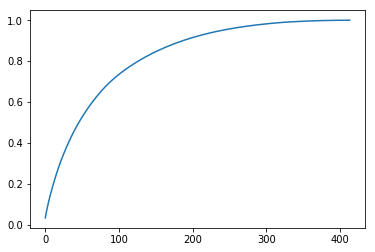

In [10]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

In [11]:
# How much variance we'd capture with the first 125 components
cumulative_explained_variance[124]

0.7955069032205401

**Initialize and fit another PCA transformation.**
* This time, only keep 125 components.
* Generate the principal component features from the fitted instance and name the new matrix <code style="color:crimson">PC_items</code>.
* Then, display the shape of <code style="color:crimson">PC_items</code> to confirm it only has 125 features.

In [12]:
# Initialize PCA transformation, only keeping 125 components
pca = PCA(n_components=125)

# Fit and transform item_data_scaled
PC_items = pca.fit_transform(item_data_scaled)

# Display shape of PC_items
PC_items.shape
PC_items

array([[ 5.87613867,  4.82893288, -0.49555126, ..., -0.51093589,
        -0.01782463, -0.10765479],
       [-4.21984057,  1.22616685, -1.88188358, ...,  1.51537648,
        -1.07427082, -1.08908295],
       [-1.26086078,  2.38762974, -0.07308156, ..., -0.35943071,
        -0.23873194, -0.82403623],
       ...,
       [-5.21816414,  3.64840204,  2.50642203, ..., -0.25233441,
        -0.50745331,  0.18682404],
       [-4.9361361 ,  3.02165725, -1.50722483, ...,  1.28380386,
        -3.08617722, -2.19535622],
       [-6.04237281, -0.29136161, -0.67402733, ..., -0.64614711,
        -0.2371379 , -0.12794176]])

**Next, for convenience, let's put <code style="color:crimson">PC_items</code> into a new dataframe.**
* We'll also name the columns and update its index to be the same as the orginal <code style="color:crimson">item_data</code>'s index.

In [13]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = ['PC{}'.format(i+1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index = item_data.index

# Display first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,5.876139,4.828933,-0.495551,3.093848,-0.633727,-11.534080,2.161805,7.117020,5.336039,4.424626,4.636781,2.316493,12.310501,1.987126,-11.430947,5.617400,-2.177414,7.665749,-12.135181,-16.048848,-5.949340,7.814847,40.519714,-35.573777,-17.556312,6.867821,20.887369,2.297425,-26.158967,-32.580534,7.888821,12.351703,6.822566,-32.958753,-4.412264,-17.239557,-11.264862,-14.489353,-2.766240,4.731663,-6.992534,-1.462362,10.602757,1.248141,3.099896,5.322033,-0.396006,1.534629,-6.396785,3.079531,...,2.301762,2.601544,-0.687106,-1.763603,-2.084696,1.139956,0.447395,-1.311498,-2.025272,-3.540466,0.055739,-1.815766,0.784716,0.211283,1.309606,-1.771990,0.505571,0.243489,-0.300930,0.665704,-0.514770,-0.358105,0.071578,0.280522,0.009097,-0.554311,-1.750517,-0.105403,-0.265287,-0.521976,0.201938,-0.957070,0.859687,1.080473,0.503244,-0.354350,-0.061217,1.214446,-0.333002,-0.652112,0.401169,0.374311,-0.150013,-0.368806,-0.054048,0.121270,-0.056227,-0.510936,-0.017825,-0.107655
12348,-4.219841,1.226167,-1.881884,-0.174398,0.818134,1.160917,-0.871339,-0.846775,0.460095,0.853765,-0.400662,0.981580,-1.103585,0.769865,-0.093262,-0.312199,-0.447828,1.207506,0.380111,-0.469528,0.185512,0.051400,0.496261,0.371631,1.224350,-0.769620,-0.273204,0.850413,-0.375991,-0.573712,1.007457,-0.576834,0.957353,-0.740239,0.347102,-0.385084,-0.302027,0.389056,0.157973,0.327545,-0.448370,0.708398,1.197140,-0.203035,-0.880833,-0.054699,-0.421457,-1.623977,-0.402551,0.456815,...,-1.056687,-0.945719,-0.538166,-0.355999,0.119297,0.253755,-0.752840,-0.445359,0.630281,0.285082,0.235993,-0.236287,-2.028540,0.151580,-0.398269,-0.899313,-0.040412,0.954068,-0.747498,0.984391,-0.157162,1.016764,1.322928,1.024939,0.364341,1.832926,0.160508,0.507391,1.321482,-0.311480,0.822351,-1.541105,-0.850650,-1.999818,-0.879263,-1.291091,0.082347,-1.218248,-0.705105,-0.460769,1.970299,-0.398462,0.934982,-0.745318,-0.874314,0.560607,-0.859276,1.515376,-1.074271,-1.089083
12349,-1.260861,2.387630,-0.073082,-1.119451,-0.033960,-3.714493,-0.343741,-0.148784,-0.788747,-0.379739,1.568221,0.184463,0.223868,-0.050728,3.180679,-0.511702,-1.838378,0.382143,0.318426,-0.003104,-0.418798,0.456987,-0.787598,1.754168,-1.477693,0.759631,-0.906569,0.762072,0.501358,-1.349196,0.285866,0.673380,0.087058,-0.216669,-0.662400,-1.521849,0.789786,-1.418960,-0.108951,-0.900171,0.113373,-0.112019,-0.163454,0.722521,1.318766,-0.229042,-0.101372,-0.200068,0.917063,1.727797,...,2.079672,-0.947996,1.361438,0.557838,0.852233,0.303429,-1.061484,0.807125,1.123405,-0.700462,1.559501,0.724806,-2.910833,-2.484654,1.265674,-3.186977,-0.885616,-1.939166,-1.542171,-2.209555,-0.339203,-1.017174,1.510651,1.493365,-1.320749,-0.193055,2.585728,-1.845006,-3.066242,-2.938069,3.221948,-3.338538,-1.179413,-2.505907,-0.993321,-1.517001,0.869638,0.125165,0.731649,-1.089506,-0.005001,-3.643564,3.338518,-0.782095,-1.181102,-0.633826,0.484996,-0.359431,-0.238732,-0.824036
12350,-4.929321,-0.714852,-1.580904,-0.469799,-0.116280,0.647710,0.113214,-1.336310,1.547032,-1.190402,-0.213223,1.057021,-0.474954,0.856487,-1.305576,0.243330,0.268630,1.952144,-0.227880,0.570597,-0.186068,0.902662,1.363566,0.176107,-0.261192,-0.165427,-0.678410,1.080497,-0.153129,-0.398503,0.238929,0.635261,-1.446023,-0.183819,-0.317622,-0.309382,-1.362497,-0.002824,0.581652,-0.246841,0.601186,-0.219053,0.293061,0.525871,-0.528223,-0.090981,-1.47288

**Finally, save this item dataframe with PCA features as <code style="color:crimson">'pca_item_data.csv'</code>.**
* In <span style="color:royalblue">Module 4</span>, we'll compare the clusters made from using these features against those in <code style="color:crimson">'threshold_item_data.csv'</code>.
* Do **not** set <code style="color:steelblue">index=None</code> because we want to keep the CustomerID's as the index.

In [14]:
# Save pca_item_data.csv
items_pca.to_csv('pca_item_data.csv')

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<br>
## Next Steps

Congratulations for making it through Project 4's Principal Component Analysis!

As a reminder, here are a few things you did in this module:
* You saw how PCA works on an oval blob.
* You contrasted plots of the original features against plots of the principal component features.
* You learned how to intepret cumulative explained variance.
* And you reduced the dimensionality of the item dataset using PCA.

In the next module, <span style="color:royalblue">Module 4: Cluster Analysis</span>, we'll see how different feature sets lead to different clusters. We'll apply K-Means clustering to the analytical base table, the threshold item features, and the PCA item features.

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>